In [1]:
! pip install -Uqq fastai nbdev fastbook

In [2]:
from fastai.text.all import *
import torch
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/comprehensive-goodreads-book-dataset/book_details.csv")

In [4]:
mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/twitter.png"))

In [5]:
df.head()

,title,url,description,genres
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. ""To Kill A Mockingbird"" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, ""To Kill A Mockingbird"" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and transla...","['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Read For School', 'Novels', 'High School']"
1,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193.Harry_Potter_and_the_Philosopher_s_Stone,"Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does battle in a deadly duel. The Reason ... HARRY POTTER IS A WIZARD!","['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Classics', 'Adventure', 'Audiobook', 'Science Fiction Fantasy']"
2,Pride and Prejudice,https://www.goodreads.com/book/show/1885.Pride_and_Prejudice,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book t...","['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook', 'Novels', 'Historical Romance', 'Adult']"
3,The Diary of a Young Girl,https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a world classic—a powerful reminder of the horrors of war and an eloquent testament to the human spirit.In 1942, with the Nazis occupying Holland, a thirteen-year-old Jewish girl and her family fled their home in Amsterdam and went into hiding. For the next two years, until their whereabouts were betrayed to the Gestapo, the Franks and another family lived cloistered in the “Secret Annexe” of an old office building. Cut off from the outside world, they faced hunger, boredom, the ...","['Classics', 'Nonfiction', 'History', 'Biography', 'Memoir', 'Historical', 'Holocaust']"
4,Animal Farm,https://www.goodreads.com/book/show/170448.Animal_Farm,"Librarian's note: There is an Alternate Cover Edition for this edition of this book here.A farm is taken over by its overworked, mistreated animals. With flaming idealism and stirring slogans, they set out to create a paradise of progress, justice, and equality. Thus the stage is set for one of the most telling satiric fables ever penned –a razor-edged fairy tale for grown-ups that records the evolution from revolution against tyranny to a totalitarianism just as terrible.When was first published, Stalinist Russia was seen as its target. Today it is devastatingly clear that wherever and wh...","['Classics', 'Fiction', 'Dystopia', 'Fantasy', 'Politics', 'Literature', 'School', 'Science Fiction', 'Novels', 'Read For School']"


In [6]:
df.shape

(6313, 4)

In [7]:
df.isnull().sum()

title           0
url             0
description    39
genres          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        6313 non-null   object
 1   url          6313 non-null   object
 2   description  6274 non-null   object
 3   genres       6313 non-null   object
dtypes: object(4)
memory usage: 197.4+ KB


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

title          0
url            0
description    0
genres         0
dtype: int64

In [11]:
df.shape

(6274, 4)

In [12]:
df["description_new"]=df['title']+" "+df["description"]

In [13]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 640
{'Classics': 1918, 'Fiction': 4315, 'Historical Fiction': 1262, 'School': 423, 'Literature': 1363, 'Young Adult': 1263, 'Historical': 1008, 'Read For School': 109, 'Novels': 1657, 'High School': 77, 'Fantasy': 1664, 'Magic': 387, 'Childrens': 572, 'Middle Grade': 406, 'Adventure': 931, 'Audiobook': 1915, 'Science Fiction Fantasy': 511, 'Romance': 1185, 'Historical Romance': 76, 'Adult': 1278, 'Nonfiction': 1527, 'History': 630, 'Biography': 554, 'Memoir': 476, 'Holocaust': 78, 'Dystopia': 292, 'Politics': 353, 'Science Fiction': 710, 'France': 154, 'Philosophy': 698, 'French Literature': 76, 'American': 369, 'Coming Of Age': 162, 'Epic Fantasy': 113, 'High Fantasy': 192, 'War': 340, 'World War II': 155, 'Books About Books': 49, 'Gothic': 86, '19th Century': 158, 'Christian': 187, 'Christian Fiction': 71, 'Plays': 152, 'Drama': 468, 'Poetry': 232, 'Contemporary': 1306, 'Picture Books': 120, 'Juvenile': 176, 'Short Stories': 282, 'Kids': 61, 'Animals': 159, 'Chapter

In [14]:
genre_list = []
indices_to_drop = []
for idx, genres in enumerate(df.genres.to_list()):
  genres_list = eval(genres)
  if len(genres_list):
    genre_list.append(genres_list[0])
  else:
    indices_to_drop.append(idx)

df = df.drop(df.index[indices_to_drop]).reset_index(drop=True)
df.shape

(6119, 5)

In [15]:
df['genre'] = genre_list

In [16]:
df.drop(columns=["title","url","description","genres"],axis=1,inplace=True)

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    if isinstance(text, str):
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = re.sub(r"[^a-zA-Z]", " ", text)
        text = text.translate(str.maketrans("", "", string.punctuation))

        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        text = re.sub(r"#.*", "", text)
        text = re.sub(r"/\*.*?\*/", "", text, flags=re.DOTALL)
        text = text.lower()

       
        nltk_stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in nltk_stop_words]

        text = ' '.join(tokens)

        return text
    else:
        return ""


In [18]:
df["description_new"]=df["description_new"].apply(clean_text)

<ipython-input-17-5a427ec412a1>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [19]:
df.head()

,description_new,genre
0,kill mockingbird unforgettable novel childhood sleepy southern town crisis conscience rocked kill mockingbird became instant bestseller critical success first published went win pulitzer prize later made academy award winning film also classic compassionate dramatic deeply moving kill mockingbird takes readers roots human behavior innocence experience kindness cruelty love hatred humor pathos million copies print translated forty languages regional story young alabama woman claims universal appeal harper lee always considered book simple love story today regarded masterpiece american liter...,Classics
1,harry potter philosopher stone harry potter thinks ordinary boy rescued owl taken hogwarts school witchcraft wizardry learns play quidditch battle deadly duel reason harry potter wizard,Fantasy
2,pride prejudice alternate cover edition isbn since immediate success pride prejudice remained one popular novels english language jane austen called brilliant work darling child vivacious heroine elizabeth bennet delightful creature ever appeared print romantic clash opinionated elizabeth proud beau mr darcy splendid performance civilized sparring jane austen radiant wit sparkles characters dance delicate quadrille flirtation intrigue making book superb comedy manners regency england,Classics
3,diary young girl discovered attic spent last years life anne frank remarkable diary become world classic powerful reminder horrors war eloquent testament human spirit nazis occupying holland thirteen year old jewish girl family fled home amsterdam went hiding next two years whereabouts betrayed gestapo franks another family lived cloistered secret annexe old office building cut outside world faced hunger boredom constant cruelties living confined quarters ever present threat discovery death diary anne frank recorded vivid impressions experiences period turns thoughtful moving surprisingly ...,Classics
4,animal farm librarian note alternate cover edition edition book farm taken overworked mistreated animals flaming idealism stirring slogans set create paradise progress justice equality thus stage set one telling satiric fables ever penned razor edged fairy tale grown ups records evolution revolution tyranny totalitarianism terrible first published stalinist russia seen target today devastatingly clear wherever whenever freedom attacked whatever banner cutting clarity savage comedy george orwell masterpiece meaning message still ferociously fresh,Classics


In [20]:
df["genre"].value_counts()

genre
Fiction                  1308
Nonfiction                677
Fantasy                   610
Classics                  453
Historical Fiction        328
                         ... 
Medicine                    1
Portuguese Literature       1
Young Adult Romance         1
Pulp                        1
Mental Illness              1
Name: count, Length: 151, dtype: int64

In [21]:

import plotly.express as px


genre_counts = df["genre"].value_counts().reset_index()
genre_counts.columns = ["genre", "count"]

fig = px.bar(genre_counts,x="genre",y="count",title="Genre Countplot",color="genre")


fig.update_layout(xaxis_title="Genre",yaxis_title="Count", template="plotly_white")

fig.show()


In [22]:
top5_genres = genre_counts.head(5)

fig = px.pie(
    top5_genres,
    names="genre",
    values="count",
    title="Top 5 Genre Distribution",
    color="genre",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

In [23]:
fig = px.pie(
    top5_genres,
    names="genre",
    values="count",
    title="Top 5 Genre Distribution - Donut Chart",
    color="genre",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0.6 
)

fig.show()

# Most Common Words From text Data

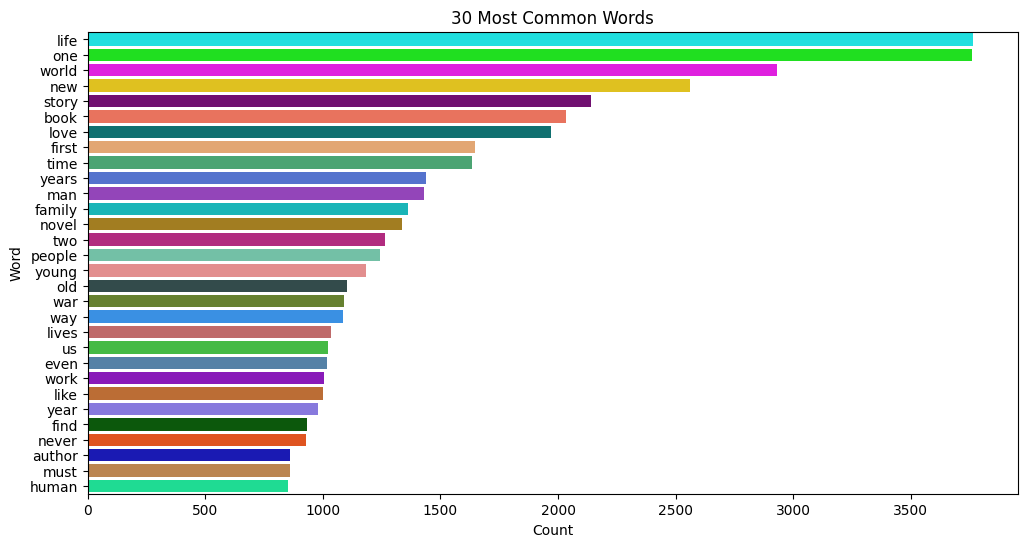

In [24]:
from itertools import chain
data_set =df["description_new"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

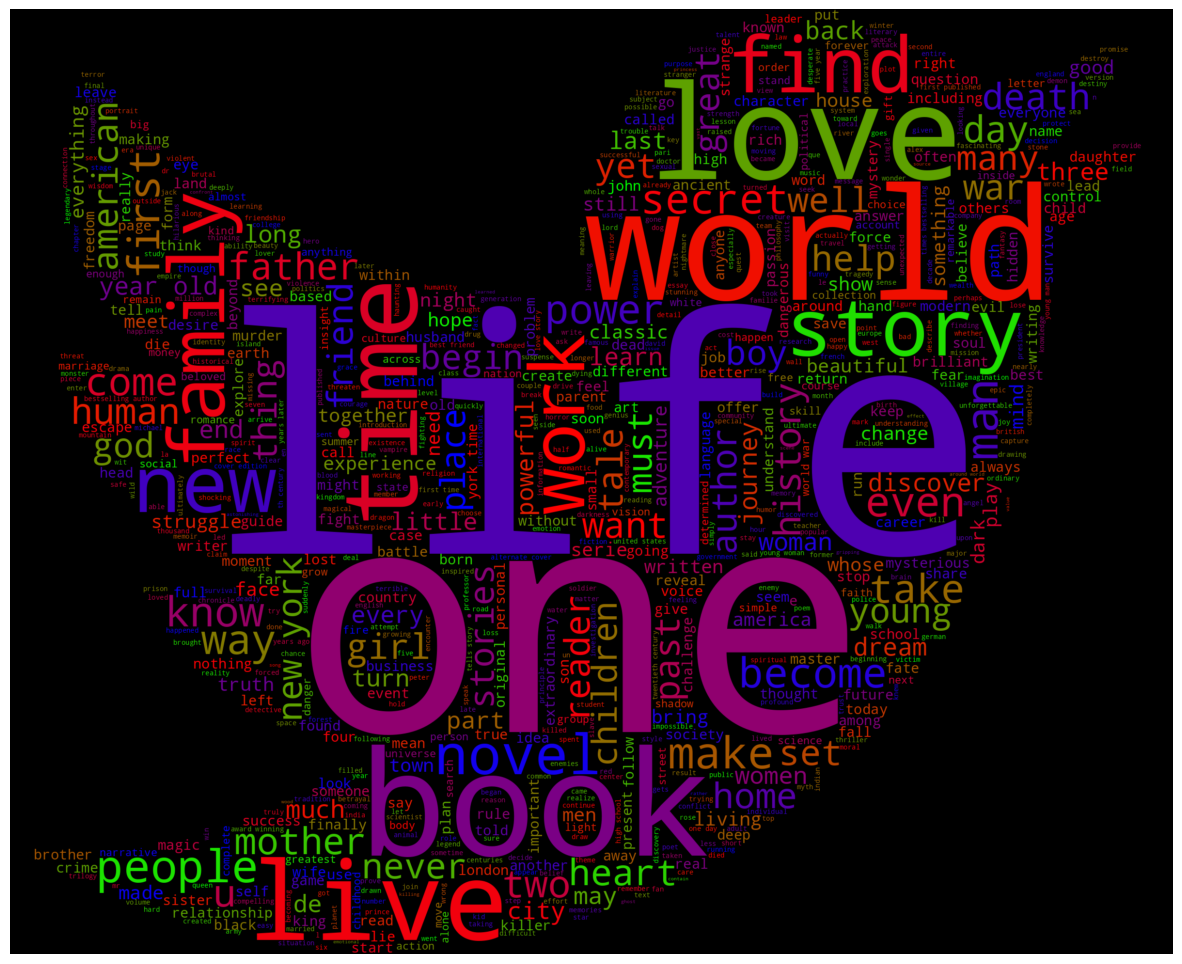

In [25]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
all_text=" ".join(df['description_new'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="brg",mask=mask).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
df['genre'] = df['genre'].str.lower() 
df['genre'] = df['genre'].replace('Gender', 'gender')

In [27]:
# 1. First, double check for any 'gender' in the data
print("Rows with 'gender' label:", df[df['genre'] == 'gender'].shape[0])

# 2. Clean data completely
df_clean = df.copy()
df_clean = df_clean[df_clean['genre'] != 'gender']  # Explicitly remove gender
df_clean = df_clean.reset_index(drop=True)

# Filter rare genres
min_examples = 5
genre_counts = df_clean['genre'].value_counts()
frequent_genres = genre_counts[genre_counts >= min_examples].index
df_clean = df_clean[df_clean['genre'].isin(frequent_genres)]

print("\nVerification:")
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)
print("'gender' in cleaned data:", 'gender' in df_clean['genre'].unique())

# 3. Create new splits
df_clean = df_clean.reset_index(drop=True)  # Reset index again
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df_clean))

Rows with 'gender' label: 1

Verification:
Original shape: (6119, 2)
Cleaned shape: (5970, 2)
'gender' in cleaned data: False


In [28]:
genres = sorted(df_clean['genre'].unique())
dls = TextDataLoaders.from_df(df_clean,path='.',text_col='description_new',label_col='genre',seed=42, 
                              shuffle=True,splitter=splits,vocab={'genre': genres})

dls.show_batch(max_n=3)

,text,category
0,xxbos art startup fundraising art startup fundraising takes fresh look raising money startups focus changing face startup finance new regulations making old go advice less relevant startup money increasingly moving online new waters uncharted founders need accessible guide book helps navigate online world startup fundraising easy follow explanations expert perspective new digital world finance find tips tricks raising money investing startups early stage growth stage develop clear strategy based new realities surrounding today startup landscape finance world massive state xxunk changes occurring increasing pace xxunk intensely startup sphere paradigm changes processes must change book shows startup funding works expert coaching toward new rules field learn jobs act impacts fundraising model gain insight startups early stage growth stage find money need get venture going craft pitch xxunk strategy build momentum identify right investors avoid common xxunk rely tales superstar startups stories unique applied exceptional scenarios game changed playing old rules gets,business
1,xxbos os maias xxunk xxunk de xxunk xxunk os maias uma das xxunk mais xxunk escritor xxunk e de xxunk livro foi publicado xxunk em ac de os maias xxunk se em lisboa na segunda xxunk xxunk xxunk e xxunk nos hist ria de tr xxunk es da xxunk lia maia ac inicia se xxunk de quando afonso da maia xxunk e pobre xxunk rio se xxunk xxunk com xxunk xxunk xxunk em xxunk xxunk momento xxunk se uma xxunk xxunk da casa xxunk cujo nome tem xxunk num xxunk de xxunk com um ramo de xxunk e n em algo fresco ou xxunk tal como nome nos xxunk xxunk afonso da maia era xxunk mais xxunk tico romance e xxunk que autor mais xxunk xxunk n se lhe xxunk xxunk um xxunk de car xxunk xxunk e xxunk nos xxunk em xxunk xxunk xxunk xxunk xxunk e foi xxunk,classics
2,xxbos emotional intelligence emotional intelligence succinctly explains deal emotions creatively employ intelligence beneficial way dalai xxunk first time ever book xxunk revolutionary program helps people identify eq skills build skills strengths enjoy consistent performance pursuit important life objectives book contains proven strategies decade long effort accurately measure increase emotional intelligence trusted upper echelon leaders inside companies worldwide strategies enable capitalize skills responsible performance types jobs includes xxunk online access world bestselling emotional intelligence test emotional intelligence xxunk show eq stands today begin maximizing immediately rooted sound research involving responses new edition test pinpoint book emotional intelligence strategies increase eq reveal specific behaviors responsible eq scores allow test second time measure much eq increased efforts book smooth narrative style turns rigorous research memorable stories practical strategies anyone use advantage people saying emotional intelligence fast read compelling anecdotes good context understand improve score newsweek xxunk people role emotions daily life enabled authors,psychology


# Save DataLoader

In [29]:
import os
output_dir="/kaggle/working/dataloaders"
os.makedirs(output_dir,exist_ok=True)

In [30]:
torch.save(dls, "/kaggle/working/dataloaders/dataloader.pkl")

In [31]:
dls = torch.load("/kaggle/working/dataloaders/dataloader.pkl",weights_only=False)

# text_classifier_learner

In [32]:
from sklearn.metrics import f1_score

def f1_metric(preds, targs):
    preds = preds.argmax(dim=1).cpu()
    targs = targs.cpu()
    return f1_score(targs, preds, average='weighted')



learner = text_classifier_learner(dls, AWD_LSTM,drop_mult=0.2,metrics=[accuracy, Perplexity(), f1_metric]).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [33]:
learner.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(18936, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(18936, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0-2): 3 x RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.08000000000000002, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)
      )
      (1): LinBnDrop

# Train Model

In [34]:
learner.fine_tune(30, 0.01)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



epoch,train_loss,valid_loss,accuracy,perplexity,f1_metric,time
0,3.005123,2.373598,0.371859,10.735952,0.339011,00:06


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



epoch,train_loss,valid_loss,accuracy,perplexity,f1_metric,time
0,2.086512,2.047488,0.443049,7.748413,0.407210,00:13
1,1.823227,1.915794,0.463149,6.792330,0.416565,00:12
2,1.630190,1.997012,0.452261,7.367013,0.407758,00:12
3,1.432840,2.099425,0.427136,8.161478,0.405403,00:12
4,1.188181,2.120459,0.453099,8.334965,0.436712,00:12
5,0.959810,2.248263,0.444724,9.471269,0.422832,00:12
6,0.782127,2.392952,0.455611,10.945761,0.427695,00:12
7,0.590916,2.817374,0.379397,16.732857,0.376668,00:12
8,0.469226,2.540976,0.454774,12.692056,0.441760,00:12
9,0.348303,2.808974,0.428811,16.592882,0.418814,00:12


In [35]:
os.makedirs("/kaggle/working/model_dir",exist_ok=True)
learner.save("/kaggle/working/model_dir/book_genre_classifier_model")

Path('/kaggle/working/model_dir/book_genre_classifier_model.pth')

In [36]:
learner.load("/kaggle/working/model_dir/book_genre_classifier_model")

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [37]:
text = "Step into a world of boundless imagination, where captivating characters navigate extraordinary circumstances. Fiction transports readers to places both familiar and fantastical, weaving tales of love, betrayal, adventure, and mystery. Whether exploring the depths of human emotion, unraveling the complexities of relationships, or embarking on epic journeys, a fiction book invites readers to escape, reflect, and dream. Each page is a gateway to a story that lingers long after the final chapter."


prediction = learner.predict(text)
print(f"Predicted Label: {prediction[0]}")
print(f"Class Probabilities: {prediction[2]}")


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



Predicted Label: fantasy
Class Probabilities: tensor([6.2915e-07, 4.8340e-06, 3.4547e-06, 1.6161e-05, 2.0788e-07, 2.4307e-06,
        1.4673e-05, 1.2080e-06, 1.5734e-02, 3.4886e-06, 6.5431e-06, 3.8913e-07,
        6.8284e-08, 8.5493e-07, 3.4886e-06, 3.4067e-05, 2.0791e-06, 5.8126e-01,
        7.2038e-06, 3.1356e-01, 3.2423e-06, 1.8893e-06, 3.2328e-06, 8.9286e-04,
        1.4343e-07, 4.0042e-05, 9.6654e-06, 6.1698e-07, 1.4857e-05, 1.1147e-05,
        7.1094e-06, 4.8712e-07, 2.2879e-06, 1.7642e-07, 1.5211e-06, 4.7267e-06,
        4.4664e-06, 5.0594e-05, 1.3686e-07, 3.0676e-04, 6.3863e-05, 1.2569e-05,
        1.2975e-05, 2.7380e-05, 9.6701e-06, 5.1273e-04, 7.0082e-04, 1.5124e-05,
        2.1704e-06, 2.6188e-04, 2.6905e-06, 1.6875e-04, 8.5724e-02, 1.2651e-04,
        2.0879e-04, 1.9847e-05, 1.6870e-06, 9.8431e-05, 1.7888e-06, 4.4403e-06,
        4.2405e-07, 1.5972e-06, 9.1287e-06, 2.1616e-07])


In [38]:
interp = Interpretation.from_learner(learner)
interp.plot_top_losses(9)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



,input,target,predicted,probability,loss
0,xxbos phenomena lost forgotten children raised within community new zealand xxunk mental hospital village family members working psychiatric hospital time another sometimes shared primary school young patients came hospital turning fifteen often worked hill helping xxunk laundry wards xxunk therapy young age absorbed stories difficult know fiction ended greater truth took separate truths almost truths stage would impossible task many concerned died therefore blended together various stories narrative representative family friends combined belief probably happen period covered narrative wherever possible used correct dates names places xxunk doubt mind changed names details protection still living child knew malcolm young man since dad often invited home meals one lost children forgotten abandoned families followed malcolm story childhood adulthood best could even eventually xxunk back community considering tragedy abuse malcolm wasted earlier years story immeasurable sadness yet ultimately rose admirable strength courage innate resilience finally able free regular boy within always wanted malcolm,historical fiction,nonfiction,0.9996591806411743,21.070758819580078
1,xxbos prince machiavelli needs looked really hence machiavelli makes following observations machiavellian understand xxunk term know nature people one need prince know nature prince one need people prince given vices make hated xxunk subjects show affection opportunity made moses xxunk xxunk theseus others virtue xxunk xxunk opportunity making xxunk noble happy armed prophets win xxunk lose without faith religion man achieves power glory prominent citizens want command xxunk populace wants free oppression prince needs friendly populace otherwise diversity hope prince rules man valor avoids disasters nations based mercenary forces never solid secure mercenaries dangerous cowardice two ways fight one laws force first rightly man way second way beasts,classics,fantasy,0.9998819828033447,21.070758819580078
2,xxbos love armin september year young germanic warrior known armin friends arminius roman enemies successfully took defeated three entire roman legions resulted deaths twenty thousand roman soldiers turn resulted roman emperor called tiberius recalling roman military units germania germanic tribes would associate common good often meeting forming offensive defensive war always separate independent armin knew best way ensure country bothered outside invaders become single country complete army navy crossed swords independent temper people want king anywhere telling due course resulted even members family taking arms order make sure tribes germania remained independent free concern ancient germanic tribesmen might case armin murdered members family,fiction,historical fiction,0.9995530247688293,20.504552841186523
3,xxbos love armin september year young germanic warrior known armin friends arminius roman enemies successfully took defeated three entire roman legions resulted deaths twenty thousand roman soldiers turn resulted roman emperor called tiberius recalling roman military units germania germanic tribes would associate common good often meeting forming offensive defensive war always separate independent armin knew best way ensure country bothered outside invaders become single country complete army navy crossed swords independent temper people want king anywhere telling due course resulted even members family taking arms order make sure tribes germania remained independent free concern ancient germanic tribesmen might case armin murdered members family,fiction,historical fiction,0.9995530247688293,20.054428100585938
4,xxbos sometimes funny tragically graphic compelling tale woman suffering warning graphic content themes name every name everyone ever called nameless good job beautiful home wonderful husband everything supposed structure stability lost trying whole life spent trying yet whole life nothing apology tired tryi

In [39]:
interp.plot_top_losses(range(7,16))

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



,input,target,predicted,probability,loss
0,xxbos phenomena lost forgotten children raised within community new zealand xxunk mental hospital village family members working psychiatric hospital time another sometimes shared primary school young patients came hospital turning fifteen often worked hill helping xxunk laundry wards xxunk therapy young age absorbed stories difficult know fiction ended greater truth took separate truths almost truths stage would impossible task many concerned died therefore blended together various stories narrative representative family friends combined belief probably happen period covered narrative wherever possible used correct dates names places xxunk doubt mind changed names details protection still living child knew malcolm young man since dad often invited home meals one lost children forgotten abandoned families followed malcolm story childhood adulthood best could even eventually xxunk back community considering tragedy abuse malcolm wasted earlier years story immeasurable sadness yet ultimately rose admirable strength courage innate resilience finally able free regular boy within always wanted malcolm,historical fiction,nonfiction,0.9996585845947266,16.845067977905273
1,xxbos pieces gold self growth use inspirational quotes effectively inspirational quotes xxunk really work today get amazon bestseller regularly priced read xxunk mac smart phone xxunk kindle device discover xxunk every day month xxunk speak lofty phrases really relate earth besides working make smile think xxunk learn learn choose xxunk learn dream embarrassed xxunk smile quote inner xxunk see life get better chance xxunk begin believe remarkable xxunk see bad attitude like flat xxunk believe xxunk dreams matter inspirational quote became useless take action today download book limited time xxunk begin life change today check others saying thought provoking insightful looking life wonderful lens fun book author enjoys life life seems simple easy reading common sense logic humour insight rolled one little package pieces gold golden xxunk self growth social skills positive thinking inspirational quotes life path positive affirmations social anxiety,novels,nonfiction,0.9941202998161316,16.40621566772461
2,xxbos time love time die quintessential author wartime germany time love time die echoes harrowing insights masterpiece quiet western front two years russian front xxunk graeber finally receives three weeks leave since leaves xxunk decides write parents fearing would raise hopes graeber arrives home finds house bombed ruin parents nowhere sight nobody knows dead alive leave draws close graeber reaches elisabeth childhood friend like imprisoned world create time war love seems world away sometimes temporary comfort lead something unexpected redeeming,classics,fiction,0.9935281872749329,15.88028335571289
3,xxbos matching configurations matching configurations second sequel quantum roots light sci fi adventure story features everyday olan chapman hero vigilante defends weak helpless victims today society like first two editions quantum roots matching configurations based growing belief creation forms recycled energy people evolve recycled quarks book contains humor science chapman returns earth someone manages elude director paranormal affairs lt general alexis grumman keeps feet ground young lover jeremy wade goes cloud bound xxunk motor xxunk flies book content suitable readers,novels,science fiction,0.8679473400115967,15.810379981994629
4,xxbos jester freedom eleventh century france luxury enjoyed king nobility xxunk surely worth fighting worth dying arriving home disillusioned crusades hugh xxunk discovers village ransacked wife abducted dark riders came dead night like devils wearing colours black crosses xxunk leaving clue knights may honour chivalry part code search relic one worth throne europe man stand way hugh taking role jester able infiltrate enemy castle believes wife held captive man fighting freedom wife everythi

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



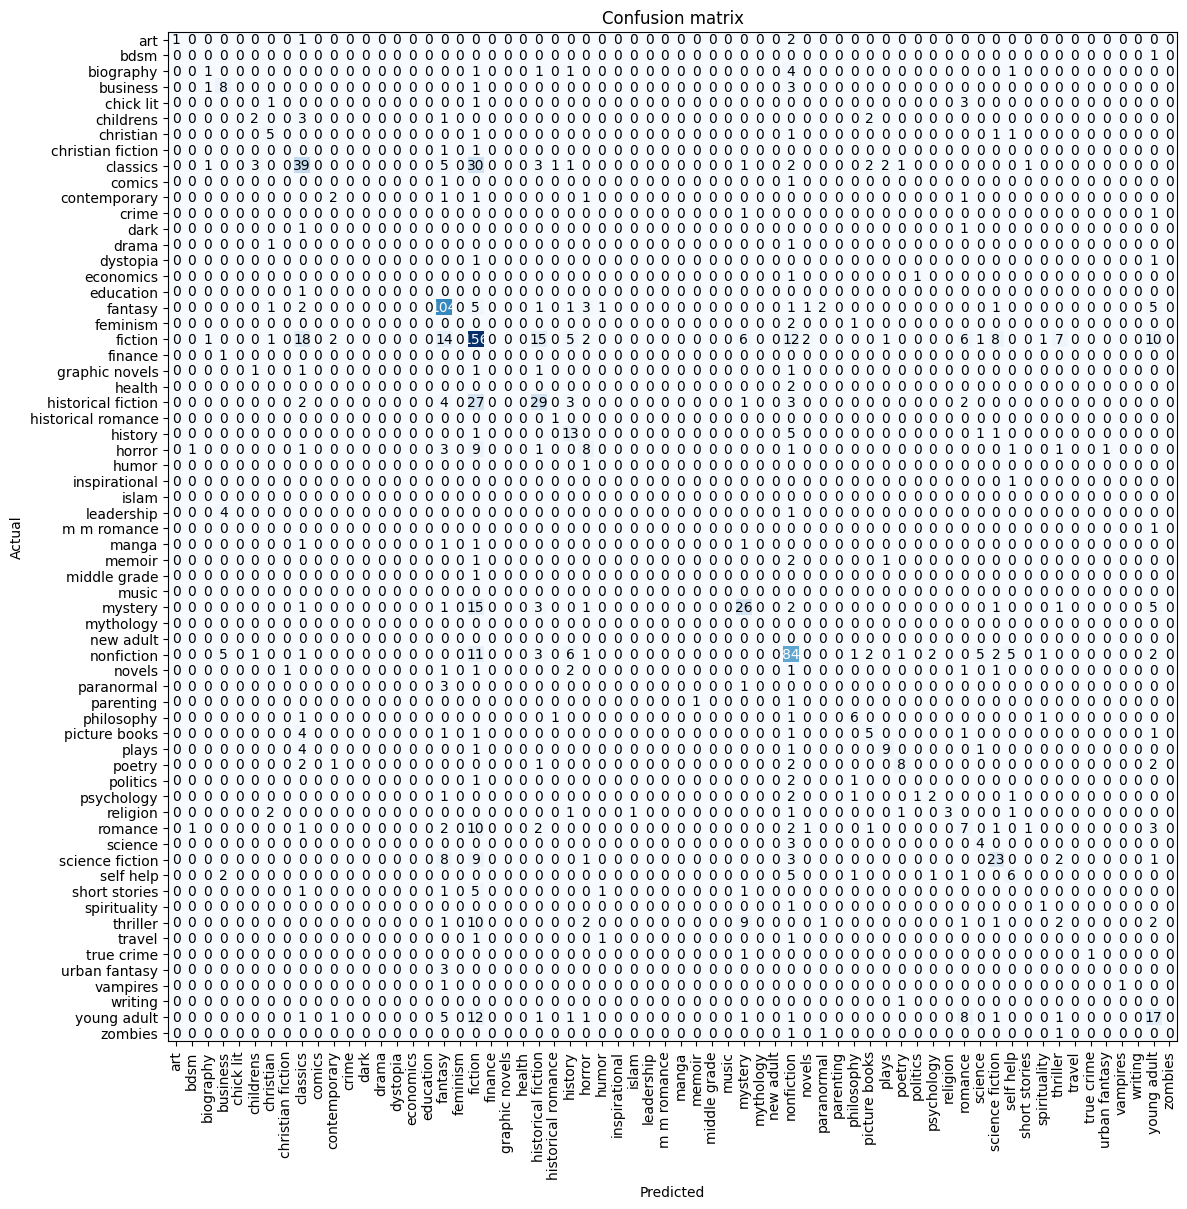

In [40]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(15,12))


In [41]:
interp.most_confused(min_val=2)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



[('classics', 'fiction', 30),
 ('historical fiction', 'fiction', 27),
 ('fiction', 'classics', 18),
 ('fiction', 'historical fiction', 15),
 ('mystery', 'fiction', 15),
 ('fiction', 'fantasy', 14),
 ('fiction', 'nonfiction', 12),
 ('young adult', 'fiction', 12),
 ('nonfiction', 'fiction', 11),
 ('fiction', 'young adult', 10),
 ('romance', 'fiction', 10),
 ('thriller', 'fiction', 10),
 ('horror', 'fiction', 9),
 ('science fiction', 'fiction', 9),
 ('thriller', 'mystery', 9),
 ('fiction', 'science fiction', 8),
 ('science fiction', 'fantasy', 8),
 ('young adult', 'romance', 8),
 ('fiction', 'thriller', 7),
 ('fiction', 'mystery', 6),
 ('fiction', 'romance', 6),
 ('nonfiction', 'history', 6),
 ('classics', 'fantasy', 5),
 ('fantasy', 'fiction', 5),
 ('fantasy', 'young adult', 5),
 ('fiction', 'history', 5),
 ('history', 'nonfiction', 5),
 ('mystery', 'young adult', 5),
 ('nonfiction', 'business', 5),
 ('nonfiction', 'science', 5),
 ('nonfiction', 'self help', 5),
 ('self help', 'nonfictio

In [42]:
print_report = interp.print_classification_report()  

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



                    precision    recall  f1-score   support

               art       1.00      0.25      0.40         4
              bdsm       0.00      0.00      0.00         1
         biography       0.25      0.11      0.15         9
          business       0.40      0.62      0.48        13
         chick lit       0.00      0.00      0.00         5
         childrens       0.29      0.25      0.27         8
         christian       0.45      0.56      0.50         9
 christian fiction       0.00      0.00      0.00         2
          classics       0.45      0.42      0.44        92
            comics       0.00      0.00      0.00         2
      contemporary       0.33      0.33      0.33         6
             crime       0.00      0.00      0.00         2
              dark       0.00      0.00      0.00         2
             drama       0.00      0.00      0.00         2
          dystopia       0.00      0.00      0.00         2
         economics       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

In [43]:
learner.show_results() 

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



,text,category,category_
0,xxbos la mort est mon tier la mort est mon tier sont les pseudo xxunk de rudolf h xxunk rudolf lang dans l xxunk rudolf h tait le xxunk du camp de concentration et extermination auschwitz pendant la seconde guerre mondiale l histoire commence en alors que rudolf lang ans il xxunk une xxunk xxunk mal comprise et tr xxunk son p un xxunk xxunk ayant u une xxunk militaire famille militaire xxunk xxunk qui xxunk un p ch dans sa xxunk paris et avec qui il xxunk des xxunk xxunk veut qu il xxunk pr tre pour xxunk les xxunk que lui xxunk rudolf xxunk en dieu jusqu au jour en se xxunk avec un de ses xxunk cole werner il lui xxunk la xxunk xxunk xxunk il va se xxunk un pr tre le xxunk son p devient xxunk de rage apr avoir xxunk que son xxunk xxunk,history,science fiction
1,xxbos little house collection nine book paperback box set classic series features classic black white artwork garth williams nine books timeless little house series tell story laura real childhood american pioneer cherished readers generations offer unique glimpse life american frontier tell heartwarming unforgettable story loving family little house big xxunk ingalls family laura pa mary baby carrie live cozy log cabin big woods wisconsin though many neighbors wolves xxunk bears woods feel like home thanks homemade cheese butter joyful sounds pa fiddle farmer xxunk laura ingalls growing little house kansas almanzo wilder lives big farm new york brothers sisters work hard dawn supper help keep family farm running almanzo wishes one thing horse must prove ready big responsibility little house xxunk pa decides sell log house woods family packs moves wisconsin kansas pa builds little house prairie living farm different living woods laura family kept busy happy promise new life,classics,historical fiction
2,xxbos shiva trilogy book immortals meluha bc modern indians mistakenly call xxunk valley civilisation inhabitants period called land meluha near perfect empire created many centuries earlier lord ram one greatest monarchs ever lived proud empire suryavanshi rulers face severe perils primary river revered xxunk slowly xxunk extinction also face devastating terrorist attacks east land chandravanshis make matters worse chandravanshis appear allied nagas xxunk sinister race deformed humans astonishing martial skills hope xxunk ancient legend evil reaches epic proportions seems lost appears enemies triumphed hero emerge rough hewn tibetan immigrant shiva really hero want hero drawn suddenly destiny duty well love shiva lead suryavanshi vengeance destroy evil first book trilogy shiva simple man whose karma cast xxunk god gods secret nagas today god years ago man hunt sinister naga warrior killed friend xxunk stalks wife sati shiva tibetan immigrant prophesied destroyer evil rest till finds demonic adversary vengeance path evil lead,fiction,fantasy
3,xxbos muhammad world changer intimate portrait accessible biography muhammad islam founding prophet tracing development orphan political leader providing insights personal life tastes new york times book review fresh telling familiar story result biography reads like novel washington post joyous read presenting prophet muhammad human humane insightful thoughtful thought provoking beautifully written immaculately researched meditation impact prophet muhammad modern world loved book six year old cries mother arms draws last xxunk urge muhammad world changer boy suddenly orphaned tribal society fears change must overcome enormous obstacles unleash potential inspire others fusing details long known muslim scholars xxunk popular audiences xxunk jebara brings life gripping personal story islam founding prophet dramatic birth nearly abducted slavery escaping assassination muhammad emerges unrelenting man mission surrounding protagonist dynamic women nurture muhammad jewish christian mentors inspire enslaved individuals helps liberate propel movement jebara places muhammad life broader historical context vividly